# Task 4

### Problem 1: Color Tracking

- track a monochromatic object
- create a video stream with a bounding box surrounding it by thresholding HSV or RGB values

Questions:
- Is HSV or RGB typically better?
- How large is the threshold range that you need to track the object?



# References and Improvements
I approached this problem by… 
1. Turning on the video camera capture using code referenced from:  https://docs.opencv.org/4.x/dd/d43/tutorial_py_video_display.html 
2. I converted the frame from BGR to HSV because it worked better for thresholding capture with code referenced from: https://docs.opencv.org/4.x/df/d9d/tutorial_py_colorspaces.html 
3. Next, I operated on the mask to find the contours using canny edges with code referenced from: https://docs.opencv.org/4.x/da/d22/tutorial_py_canny.html 
4. Then, I bitwise-AND mask and the original image together to form a video of my object being tracked by a contour using code referenced from: https://docs.opencv.org/4.x/dd/d49/tutorial_py_contour_features.html 
5. Finally, I saved the recorded video using code referenced from: https://docs.opencv.org/4.x/dd/d43/tutorial_py_video_display.html 


In [1]:
import cv2 as cv
import numpy as np

In [11]:
# find HSV of my blue sticky note
# I took a picture of the sticky note and put it into a color picjer

blue = np.uint8([[[147,147,103]]])
hsv_blue=cv.cvtColor(blue,cv.COLOR_BGR2HSV)
print(hsv_blue)

[[[ 90  76 147]]]


**Below is code of tracking with bounding box**

In [3]:
# easier to track color in HSV space

cap = cv.VideoCapture(0)

# record video
fourcc=cv.VideoWriter_fourcc(*'XVID')
w = int(cap.get(cv.CAP_PROP_FRAME_WIDTH))
h = int(cap.get(cv.CAP_PROP_FRAME_HEIGHT))
out = cv.VideoWriter('output.mp4',fourcc,20,(w,h))

while(cap.isOpened()):
    # Take each frame
    ret, frame=cap.read()
    
    if ret==True:

        # Convert BGR to HSV
        hsv=cv.cvtColor(frame, cv.COLOR_BGR2HSV)

        #define range of color in HSV
        lower_color=np.array([90-10,50,50]) 
        upper_color=np.array([90+10,255,255]) 

        #Threshold the HSV image to get only my color
        mask = cv.inRange(hsv,lower_color, upper_color)

        #operate on mask! get contour (already in grayscale) 

        # find canny edges
        edged=cv.Canny(mask,30,200)

        # Find contours
        contours,hierarhcy=cv.findContours(edged,cv.RETR_EXTERNAL,cv.CHAIN_APPROX_NONE)
        cv.imshow('Canny Edges After Contouring', edged)
        
        if len(contours)==0:
            continue
        
        # Draw Box
        
        for cnt in contours:
            x,y,w,h = cv.boundingRect(cnt)
            cv.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),2)
        
        #Bitwise-AND mask and original image
        res=cv.bitwise_and(frame,frame,mask=mask)
        
        # write out: frame, mask, res, edged
        out.write(frame)
        out.write(mask)
        out.write(res)
        out.write(edged)
        
        
   

        #finalRes=cv.bitwise_and()

        cv.imshow('frame',frame)
        cv.imshow('mask',mask)
        cv.imshow('res',res)

        if cv.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break
        
# Release everything if the job is finished
cap.release()
out.release()
        
cv.destroyAllWindows()

OpenCV: FFMPEG: tag 0x44495658/'XVID' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


### Problem 2: Lights off

When I turned my lights off, I could not track the object at all because my camera could not pick up the color of the object. 

### Problem 3: different brightness

I tried 3 different brightness
1. All the way down: I could pick up the color about 50-70%
2. Medium: I could pick up the color about 90%
3. All the way up: I could not pick up the color at all. I think it is because once the brightness was all the way up, it was no longer the color that I had chosen to track. The brightness was beyond the threshold

### Problem 4: find the dominant color in a central rectangle in my video feed
- use k-means
- use non-phone object and change the brightness of its surrounding
- use phone and change the brightness
- is the phone or the non-phone object more robust?

Reference: https://code.likeagirl.io/finding-dominant-colour-on-an-image-b4e075f98097

In [7]:
# !pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 7.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 6.6 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 MB 9.7 MB/s eta 0:00:00:00:0100:01


/var/folders/jw/c2wxwfxj1gd3nk4l01q2l9ww0000gn/T/ipykernel_31430/2357289686.py:48: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  clt.fit(frame)


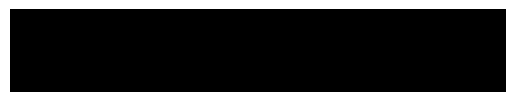

test


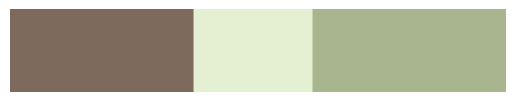

test


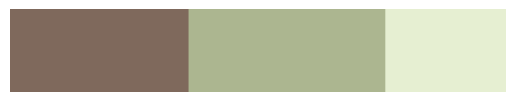

test


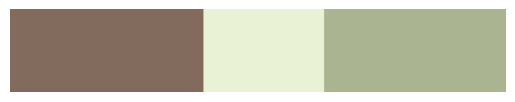

test


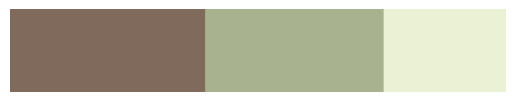

test


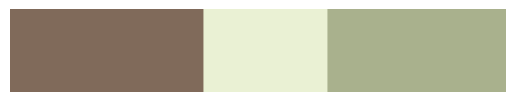

test


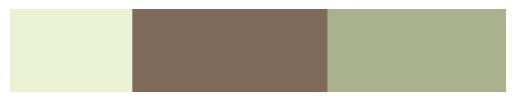

test


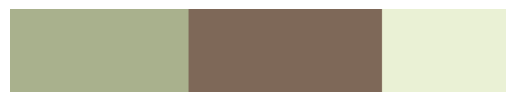

test


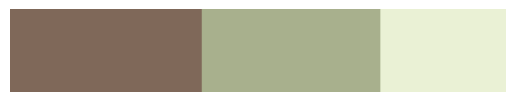

test


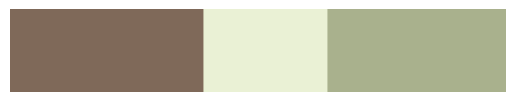

test


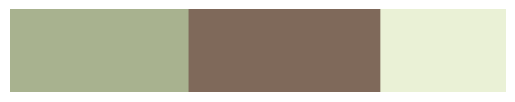

test


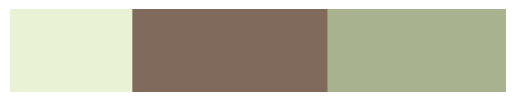

test


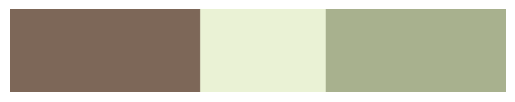

test


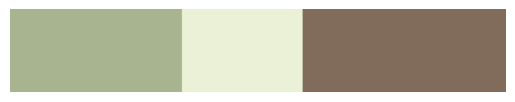

test


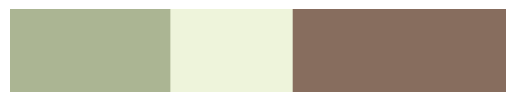

test


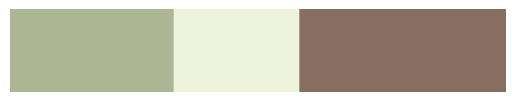

test


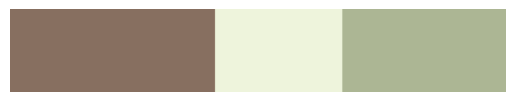

test


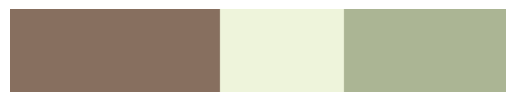

test


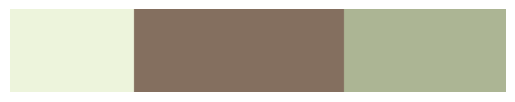

test


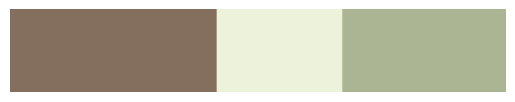

test


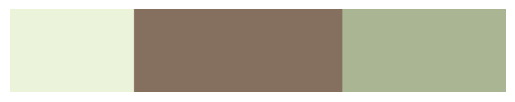

test


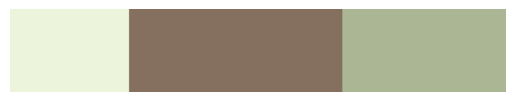

test


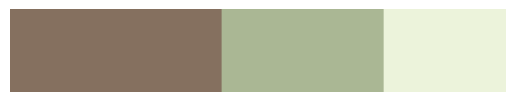

test


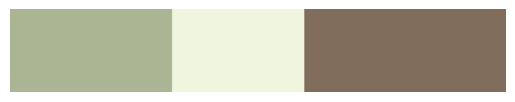

test


NameError: name 'out' is not defined

In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


def find_histogram(clt):
    """
    create a histogram with k clusters
    :param: clt
    :return:hist
    """
    numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
    (hist, _) = np.histogram(clt.labels_, bins=numLabels)

    hist = hist.astype("float")
    hist /= hist.sum()

    return hist

def plot_colors2(hist, centroids):
    bar = np.zeros((50, 300, 3), dtype="uint8")
    startX = 0

    for (percent, color) in zip(hist, centroids):
        # plot the relative percentage of each cluster
        endX = startX + (percent * 300)
        cv.rectangle(bar, (int(startX), 0), (int(endX), 50),
                      color.astype("uint8").tolist(), -1)
        startX = endX

    # return the bar chart
    return bar


cap = cv.VideoCapture(0)

while(cap.isOpened()):
    ret, frame=cap.read()
    
    if ret==True:
        cv.imshow('frame',frame)
        
        frame = cv.cvtColor(frame,cv.COLOR_BGR2RGB)
        
        frame = frame.reshape((frame.shape[0] * frame.shape[1],3)) #represent as row*column,channel number
        clt = KMeans(n_clusters=3) #cluster number
        clt.fit(frame)

        hist = find_histogram(clt)
        bar = plot_colors2(hist, clt.cluster_centers_)

        plt.axis("off")
        plt.imshow(bar)
        plt.show()
    
        if cv.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break
        
# Release everything if the job is finished
cap.release()
out.release()
        
cv.destroyAllWindows()